Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [3]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
y

array([4, 1, 2, 5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
X_poly = poly.fit_transform(X)
X_poly

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy.linalg import inv

w = np.dot(np.dot(inv(np.dot(X_poly.T, X_poly)), X_poly.T), y)
w

array([2.2       , 0.45714286])

In [6]:
from numpy.linalg import pinv

w = np.dot(pinv(X_poly), y)
w

array([2.2       , 0.45714286])

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [7]:
from sklearn.metrics import mean_squared_error

y_pred = np.dot(X_poly, w)
mean_squared_error(y, y_pred)

2.042857142857143

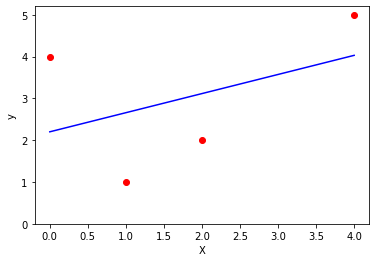

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color = "red")
plt.plot(X, y_pred, color = "blue")
plt.xlabel("X")
plt.ylabel("y")
plt.ylim(bottom=0)
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [9]:
#inv(X_poly)

In [10]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
w = np.dot(inv(X_poly), y)
w

array([ 4.        , -5.91666667,  3.375     , -0.45833333])

In [11]:
y_pred = np.dot(X_poly, w)
mean_squared_error(y, y_pred)

4.930380657631324e-32

In [12]:
def poly_predict(X, w):
    poly = PolynomialFeatures(3)
    X_poly = poly.fit_transform(X)
    return np.dot(X_poly, w)

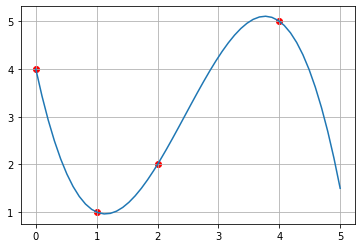

In [13]:
xaxis = np.linspace(0, 5).reshape(-1, 1)
plt.plot(xaxis, poly_predict(xaxis, w))
plt.scatter(X, y, color='red')
plt.grid()

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

print(lr.coef_, lr.intercept_)

[0.45714286] 2.2


In [15]:
y_pred = lr.predict(X)
y_pred

array([2.2       , 2.65714286, 3.11428571, 4.02857143])

In [16]:
mean_squared_error(y, y_pred)

2.042857142857143

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [17]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return np.array([(f(x) + np.random.normal(0, noise, 1)) for x in X])

In [18]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [19]:
f = lambda x: 5 + x - 2*(x**2) - 5*(x**3)

In [20]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

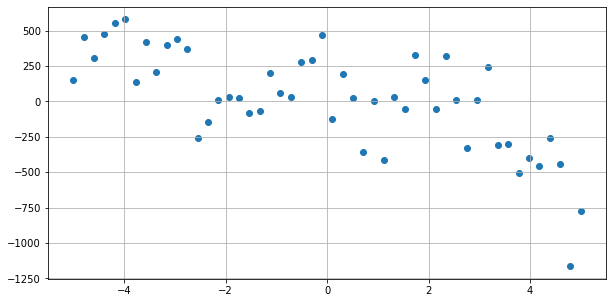

In [21]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.scatter(X, y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

In [22]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)

In [23]:
w = np.dot(pinv(X_poly), y)
w

array([[90.06145289],
       [-2.08383025],
       [-8.68756648],
       [-5.22859327]])

In [24]:
y_pred = np.dot(X_poly, w)

In [25]:
mean_squared_error(y, y_pred)

48365.892647354434

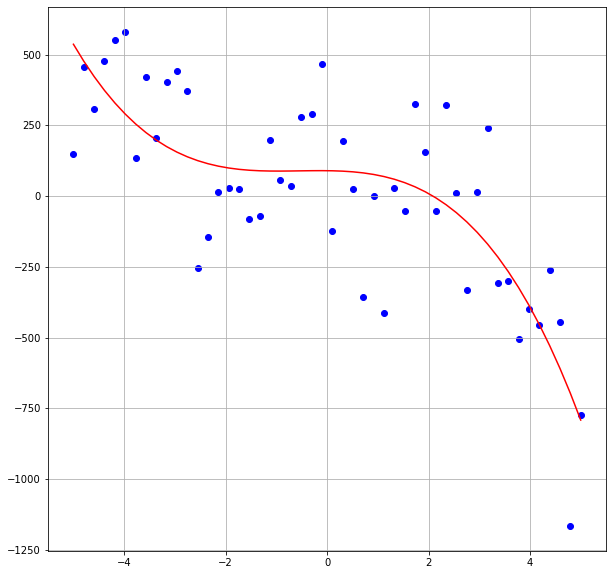

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.grid()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

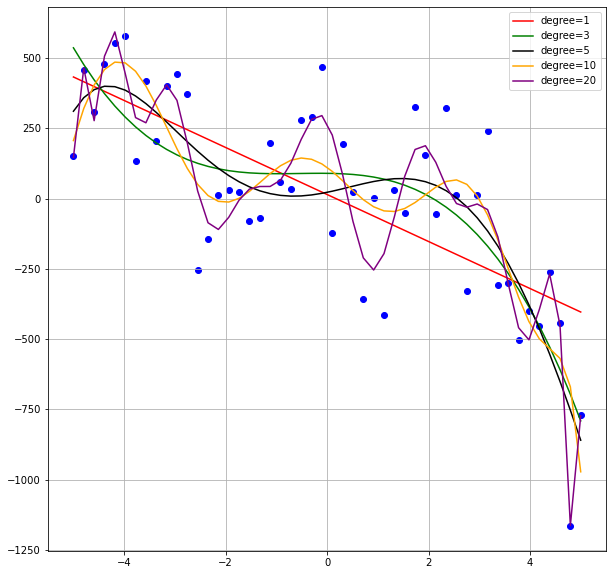

In [27]:
errors = dict()

plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(X, y, color='blue')

degrees = [1, 3, 5, 10, 20]
colors = ['red', 'green', 'black', 'orange', 'purple']
for degree, color in zip(degrees, colors):
    #calculate w
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    w = np.dot(pinv(X_poly), y)
    
    #make predictions
    y_pred = np.dot(X_poly, w)
    #plot the function
    plt.plot(X, y_pred, color=color, label='degree={}'.format(degree))
    
    #store mean squared error
    errors[degree] = mean_squared_error(y, y_pred)

plt.legend()

In [28]:
errors

{1: 63862.93219278321,
 3: 48365.892647354434,
 5: 43746.8938535214,
 10: 37496.283865812766,
 20: 19711.676439749463}

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [30]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [31]:
def get_mse(X_train, X_test, y_train, y_test):
    mse_train = []
    mse_test = []

    degrees = range(1, 21)

    for degree in degrees:
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X_train)
        w = np.dot(pinv(X_poly), y_train)

        y_pred_train = np.dot(X_poly, w)

        X_poly_test = poly.fit_transform(X_test)
        y_pred_test = np.dot(X_poly_test, w)

        mse_train.append(np.log(mean_squared_error(y_train, y_pred_train)))
        mse_test.append(np.log(mean_squared_error(y_test, y_pred_test)))
        
    return mse_train, mse_test, degrees

In [32]:
mse_train, mse_test, degrees = get_mse(X_train, X_test, y_train, y_test)

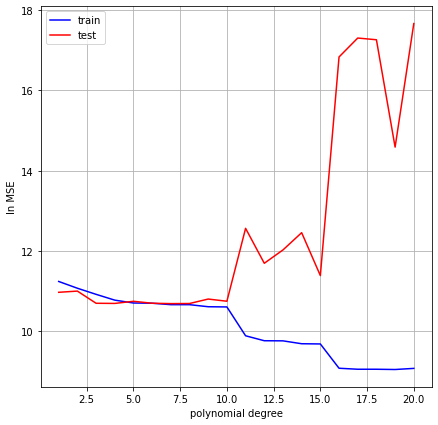

In [33]:
plt.figure(figsize=(7, 7))
plt.grid()
plt.plot(degrees, mse_train, color='blue', label='train')
plt.plot(degrees, mse_test, color='red', label="test")
plt.xlabel('polynomial degree')
plt.ylabel('ln MSE')
plt.legend()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

In [34]:
def subsample(X, y, fraction):
    N = X.shape[0]
    idx = np.random.choice([True, False], size=N, p=[fraction, 1-fraction])
    return (X[idx], y[idx])

In [35]:
datasets=dict()

X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, test_size=0.5)

for noise in [100, 200, 500]:
    y_train = make_labels(X_train, f, noise=noise)
    y_test = make_labels(X_test, f, noise=noise)
    
    datasets[(noise, 1/3)] = (subsample(X_train, y_train, 1/3), subsample(X_test, y_test, 1/3))    
    datasets[(noise, 2/3)] = (subsample(X_train, y_train, 2/3), subsample(X_test, y_test, 2/3))
    datasets[(noise, 1)] = ((X_train, y_train), (X_test, y_test))

In [36]:
datasets.keys()

dict_keys([(100, 0.3333333333333333), (100, 0.6666666666666666), (100, 1), (200, 0.3333333333333333), (200, 0.6666666666666666), (200, 1), (500, 0.3333333333333333), (500, 0.6666666666666666), (500, 1)])

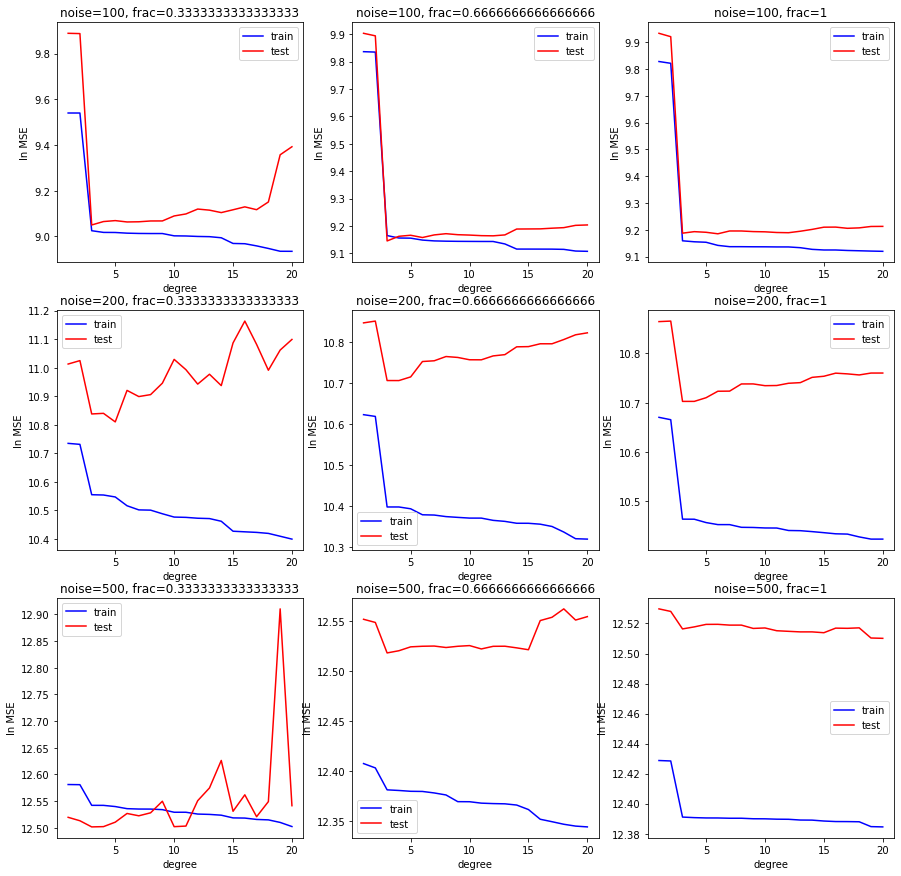

In [37]:
fig, axes = plt.subplots(3, 3, figsize=(15,15))
i = 0

for key, data in datasets.items():
    axis = axes[i//3, i%3]

    title = 'noise={}, frac={}'.format(key[0], key[1])
    train, test = data
    X_train, y_train = train
    X_test, y_test = test
    
    mse_train, mse_test, degrees = get_mse(X_train, X_test, y_train, y_test)
    axis.plot(degrees, mse_train, color='blue', label='train')
    axis.plot(degrees, mse_test, color='red', label="test")
    axis.set_title(title)
    axis.set_xlabel('degree')
    axis.set_ylabel('ln MSE')
    axis.legend()
    
    i+=1

Negativne vrijednosti ln MSE znači da je MSE jako mali, tj. između [0, 1].

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [38]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
y

array([4, 1, 2, 5])

In [39]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
X_poly

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  4., 16., 64.]])

In [40]:
m = X_poly.shape[1]
I = np.identity(m)
I[0][0] = 0
I

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [41]:
for reg in [0, 1, 10]:
    print('alpha =', reg)
    temp_inv = inv(np.dot(X_poly.T, X_poly) + reg*I)
    w = np.dot(np.dot(temp_inv, X_poly.T), y)
    print(w)
    print('---------------------------------------------------------------------------------------')

alpha = 0
[ 4.         -5.91666667  3.375      -0.45833333]
---------------------------------------------------------------------------------------
alpha = 1
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
---------------------------------------------------------------------------------------
alpha = 10
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]
---------------------------------------------------------------------------------------


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [42]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

for reg in [0, 1, 10]:
    model = Pipeline([('poly', PolynomialFeatures(3, include_bias=False)), ('model', Ridge(alpha=reg, fit_intercept=True))])
    model.fit(X, y)
    print('alpha = ', reg)
    print(model[1].coef_, model[1].intercept_)
    print('---------------------------------------------------------------------------------------')

alpha =  0
[-5.91666667  3.375      -0.45833333] 3.9999999999999467
---------------------------------------------------------------------------------------
alpha =  1
[-0.69079365 -0.2831746   0.1445805 ] 3.0569614512471652
---------------------------------------------------------------------------------------
alpha =  10
[-0.15897295 -0.13423067  0.0815601 ] 2.4944418431229733
---------------------------------------------------------------------------------------


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

In [43]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)

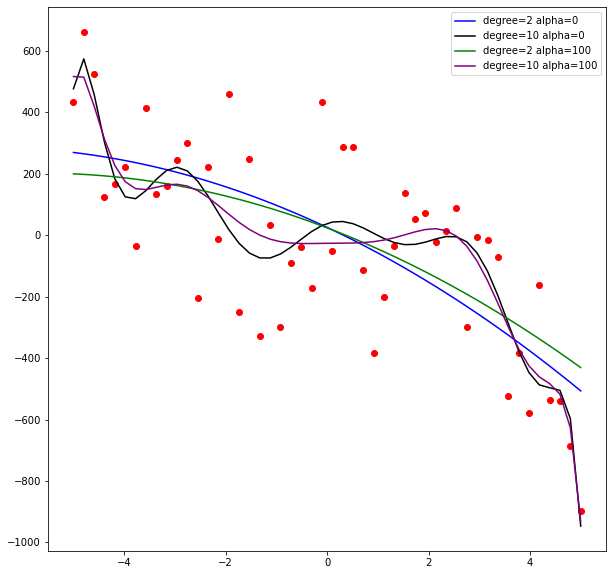

In [44]:
colors = ['blue', 'black', 'green', 'purple']
i = 0

plt.figure(figsize=(10, 10))
plt.scatter(X, y, color='red')

for alpha in [0, 100]:
    for degree in [2, 10]:
        model = Pipeline([('poly', PolynomialFeatures(degree, include_bias=False)), ('model', Ridge(alpha=alpha))])
        model.fit(X, y)
        
        #make predictions
        y_pred = model.predict(X)
        
        #plot the function
        plt.plot(X, y_pred, color=colors[i], label='degree={} alpha={}'.format(degree, alpha))
        i+=1
        
plt.legend()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


In [45]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [47]:
print(X_train.shape)

(25, 1)


In [48]:
alphas = range(0, 51)

mse_train = []
mse_test = []

for alpha in alphas:
    model = Pipeline([('poly', PolynomialFeatures(10, include_bias=False)), ('model', Ridge(alpha=alpha))])
    model.fit(X_train, y_train)

    #make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train.append(np.log(mean_squared_error(y_train, y_pred_train)))
    mse_test.append(np.log(mean_squared_error(y_test, y_pred_test)))

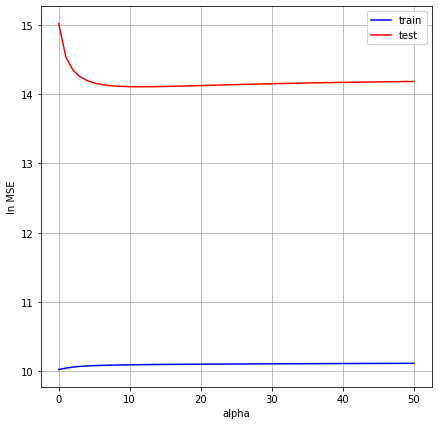

In [49]:
plt.figure(figsize=(7,7))
plt.grid()
plt.plot(alphas, mse_train, color='blue', label='train')
plt.plot(alphas, mse_test, color='red', label='test')
plt.xlabel('alpha')
plt.ylabel('ln MSE')
plt.legend()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [50]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [51]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [53]:
from sklearn.pipeline import make_pipeline

lambdas = range(1, 101)

l0_list, l1_list, l2_list = [], [], []

for alpha in lambdas:
    model = make_pipeline(PolynomialFeatures(5, include_bias=False), Ridge(alpha=alpha))
    model.fit(X_train, y_train)
    
    w = np.array(model[1].coef_)
    w = w.reshape((w.shape[1], ))
    intercept = model[1].intercept_
    
    l0_list.append(nonzeroes(w))
    l1_list.append(sum(abs(w)))
    l2_list.append(math.sqrt(np.dot(w.T, w)))

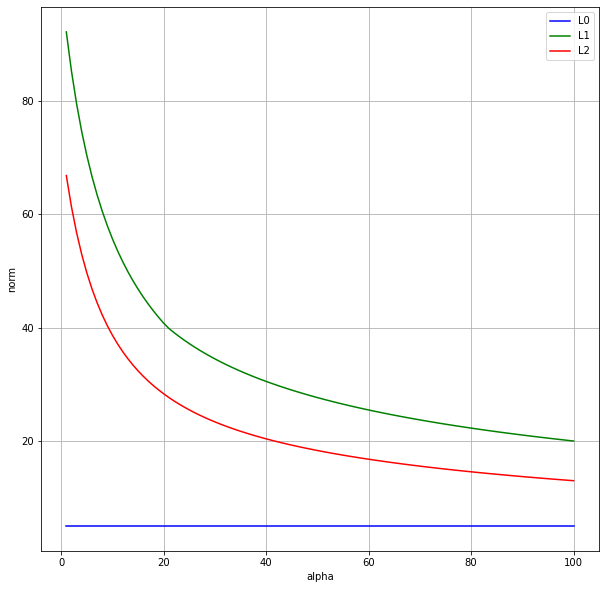

In [54]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(lambdas, l0_list, color='blue', label='L0')
plt.plot(lambdas, l1_list, color='green', label="L1")
plt.plot(lambdas, l2_list, color='red', label="L2")
plt.xlabel('alpha')
plt.ylabel('norm')
plt.legend()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [55]:
from sklearn.linear_model import Lasso

lambdas = range(1, 101)

l0_list, l1_list, l2_list = [], [], []

for alpha in lambdas:
    model = make_pipeline(PolynomialFeatures(5, include_bias=False), Lasso(alpha=alpha))
    model.fit(X_train, y_train)
    
    w = np.array(model[1].coef_)
    intercept = model[1].intercept_

    l0_list.append(nonzeroes(w))
    l1_list.append(sum(abs(w)))
    l2_list.append(math.sqrt(np.dot(w.T, w)))

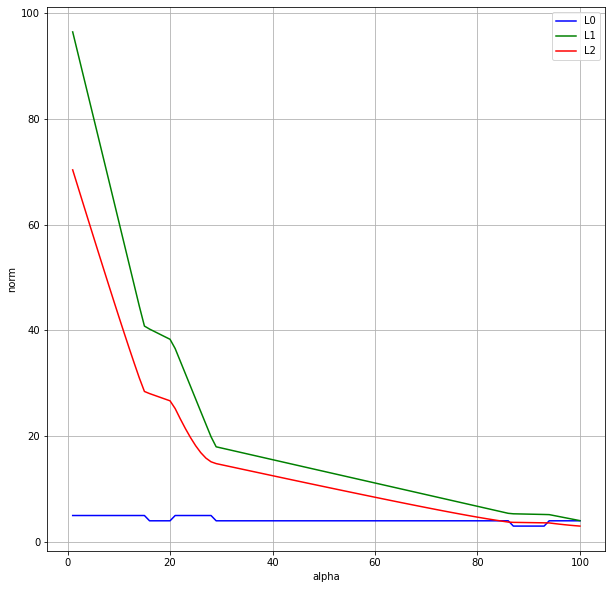

In [56]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(lambdas, l0_list, color='blue', label='L0')
plt.plot(lambdas, l1_list, color='green', label="L1")
plt.plot(lambdas, l2_list, color='red', label="L2")
plt.xlabel('alpha')
plt.ylabel('norm')
plt.legend()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [57]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

In [78]:
def draw_graph(x, y, xlabel):
    plt.grid()
    plt.scatter(x, y, color='blue')
    plt.xlabel(xlabel)
    plt.ylabel('Prosjek ocjena na fakultetu')
    plt.show()

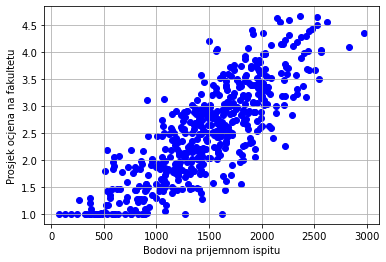

In [79]:
x = grades_X[:, 0]
y = grades_y

xlabel = 'Bodovi na prijemnom ispitu'
draw_graph(x, y, xlabel=xlabel)

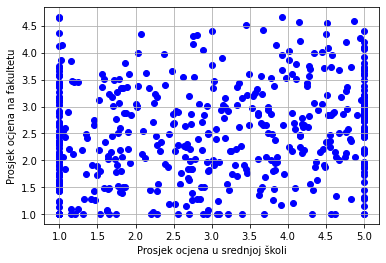

In [80]:
x = grades_X[:, 1]
y = grades_y

xlabel = 'Prosjek ocjena u srednjoj školi'
draw_graph(x, y, xlabel=xlabel)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [61]:
model = Ridge(alpha=0.01)
model.fit(grades_X, grades_y)
print('coef=', model.coef_, ', intercept=', model.intercept_)

coef= [0.00141497 0.09477276] , intercept= 0.15061179575776018


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [63]:
from sklearn.preprocessing import StandardScaler

grades_X_fixed = StandardScaler().fit_transform(grades_X)

scaler = StandardScaler()
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))

In [64]:
model = Ridge(alpha=0.01)
model.fit(grades_X_fixed, grades_y_fixed)
print('coef=', model.coef_, ', intercept=', model.intercept_)

coef= [[0.81630375 0.15167761]] , intercept= [8.62551331e-17]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [65]:
grades_X_fixed_colinear = grades_X_fixed
n, m = grades_X_fixed_colinear.shape
(n, m)

(500, 2)

In [66]:
grades_X_fixed_colinear = np.hstack((grades_X_fixed_colinear, grades_X_fixed_colinear[:, 1].reshape((n, 1))))
grades_X_fixed_colinear

array([[ 0.95063817, -0.78607869, -0.78607869],
       [-0.50343434, -0.50193004, -0.50193004],
       [ 1.18596832, -0.52213172, -0.52213172],
       ...,
       [-0.31593552,  0.80074234,  0.80074234],
       [ 0.81288393,  1.24783236,  1.24783236],
       [-0.01938126,  1.21729714,  1.21729714]])

In [67]:
grades_X_fixed_colinear.shape

(500, 3)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [68]:
model = Ridge(alpha=0.01)
model.fit(grades_X_fixed_colinear, grades_y_fixed)
print('coef=', model.coef_, ', intercept=', model.intercept_)

coef= [[0.81630364 0.07583957 0.07583957]] , intercept= [8.6255971e-17]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [69]:
model_1_coef = {0:[], 1:[], 2:[]}
model_2_coef = {0:[], 1:[], 2:[]}

In [70]:
def get_coefs(X, y, alpha, dictionary):
    model = Ridge(alpha=alpha)
    model.fit(X, y)
        
    dictionary[0].append(model.coef_[0][0])
    dictionary[1].append(model.coef_[0][1])
    dictionary[2].append(model.coef_[0][2])

In [71]:
for i in range(10):
    idx = np.random.choice([True, False], size=grades_X_fixed_colinear.shape[0], p=[0.5, 0.5])
    grades_X_sample = grades_X_fixed_colinear[idx, :]
    grades_y_sample = grades_y_fixed[idx, :]
    
    get_coefs(grades_X_sample, grades_y_sample, 0.01, model_1_coef)
    get_coefs(grades_X_sample, grades_y_sample, 1000, model_2_coef)

In [72]:
import pandas as pd
df_1 = pd.DataFrame.from_dict(model_1_coef)
df_1.columns = ['w1', 'w2', 'w3']
df_1

,w1,w2,w3
0,0.790826,0.070766,0.070766
1,0.836081,0.092014,0.092014
2,0.836031,0.077441,0.077441
3,0.829893,0.064820,0.064820
4,0.813888,0.080654,0.080654
5,0.788427,0.074449,0.074449
6,0.811921,0.087253,0.087253
7,0.803365,0.085155,0.085155
8,0.779552,0.075428,0.075428
9,0.831604,0.084750,0.084750


In [73]:
df_2 = pd.DataFrame.from_dict(model_2_coef)
df_2.columns = ['w1', 'w2', 'w3']
df_2

,w1,w2,w3
0,0.160622,0.028820,0.028820
1,0.148781,0.028430,0.028430
2,0.168815,0.034123,0.034123
3,0.164510,0.026763,0.026763
4,0.167759,0.036272,0.036272
5,0.150982,0.033529,0.033529
6,0.155378,0.034157,0.034157
7,0.168608,0.033644,0.033644
8,0.141985,0.028653,0.028653
9,0.164098,0.040723,0.040723


In [74]:
results = pd.DataFrame()
results['w1'] = [np.std(df_1.w1), np.std(df_2.w1)]
results['w2'] = [np.std(df_1.w2), np.std(df_2.w2)]
results['w3'] = [np.std(df_1.w3), np.std(df_2.w3)]
results['lambda'] = [0.01, 1000]
results = results.set_index('lambda')
results

,w1,w2,w3
lambda,,,
0.01,0.019992,0.007843,0.007843
1000.00,0.008919,0.004091,0.004091


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.